# Encuesta Nacional de Ingresos y Gastos de los Hogares 2022

In [2]:
import os
import pandas as pd

In [3]:
!ls

catalogos	   diccionario_de_datos  modelo_entidad_relacion
conjunto_de_datos  metadatos		 tareita.ipynb


# Analizando folder 'catalogo'

In [4]:
df_entidad = pd.read_csv('./catalogos/entidad.csv', encoding='latin-1')
df_entidad.head()

,entidad,descripcion
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza


In [5]:
df_ingresos_cat = pd.read_csv('./catalogos/ingresos_cat.csv', encoding='latin-1')
df_ingresos_cat.head()

,ingresos_cat,descripcion
0,P001,"Sueldos, salarios o jornal"
1,P002,Destajo
2,P003,Comisiones y propinas
3,P004,Horas extras
4,P005,"Incentivos, gratificaciones o premios"


In [6]:
df_mes = pd.read_csv('./catalogos/mes.csv', encoding='latin-1')
df_mes.head()

,mes,descripcion
0,1,enero
1,2,febrero
2,3,marzo
3,4,abril
4,5,mayo


# Analizando folder 'diccionario_de_datos'

In [7]:
df_diccionario = pd.read_csv('./diccionario_de_datos/diccionario_datos_ingresos_enigh2022_ns.csv', skiprows=9)
df_diccionario['#'].fillna(100, inplace=True) # remplazar todos los 'NaN' para que puedan ser convertidos a 'int'
df_diccionario['#'] = df_diccionario['#'].astype(int) 
df_diccionario['#'] = df_diccionario['#'].replace(100, '-') # para mejor apariencia como una index_col
df_diccionario.set_index("#", inplace=True)


df_diccionario.drop('Unnamed: 2', axis=1, inplace=True) # inutil
df_diccionario.drop('Unnamed: 7', axis=1, inplace=True) # valores vacios
df_diccionario.rename(columns={'Unnamed: 2': 'Extra 1', 'Unnamed: 5': 'Extra 2', 'Unnamed: 7': 'Extra 3'}, inplace=True)
df_diccionario.fillna('-', inplace=True)
df_diccionario

/tmp/ipykernel_115149/1664970894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diccionario['#'].fillna(100, inplace=True) # remplazar todos los 'NaN' para que puedan ser convertidos a 'int'


,Variable,Tipo,Categorías / valores nulos,Extra 2,Construcción / Observaciones
#,,,,,
0,Explotación,-,Valor,Etiqueta,-
1,folioviv,C (10),NOT NULL,-,Identificador de la vivienda compuesto por dos...
2,foliohog,C (1),NOT NULL,-,"Identificador del hogar, el código 1 identific..."
3,numren,C (2),NOT NULL,-,Número consecutivo en el registro de personas ...
4,clave,C (4),NOT NULL,-,Categorías en catálogo de ingresos
5,mes_1,C (2),-,-,-
-,-,-,07,julio,-
-,-,-,08,agosto,-
-,-,-,09,septiembre,-


In [8]:
df_variables = df_diccionario.loc[
  (df_diccionario.index != '-') & (df_diccionario['Construcción / Observaciones'] != '-'), 
  ['Variable', 'Construcción / Observaciones']
]
pd.set_option('display.max_colwidth', None)
df_variables
# for variable, obs in df_variables.values:
#   print(variable, obs, sep="\n")
#   print("-"*20)

,Variable,Construcción / Observaciones
#,,
1,folioviv,"Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm, un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada."
2,foliohog,"Identificador del hogar, el código 1 identifica al hogar principal y del 2 al 5 los hogares adicionales"
3,numren,Número consecutivo en el registro de personas del hogar
4,clave,Categorías en catálogo de ingresos
17,ing_tri,Variable construida (ver nota)
18,entidad,Variable construida con las claves de la entidad TC_ENIGHV2022_MUESTRAS;
19,est_dis,Variable definida en el diseño muestral
20,upm,Variable definida en el diseño muestral
21,factor,Factor de expansión proporcionado por el área de muestras


# Analizando folder 'conjunto_de_datos'

In [9]:
df = pd.read_csv('./conjunto_de_datos/conjunto_de_datos_ingresos_enigh2022_ns.csv')
df.head()

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,...,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,entidad,est_dis,upm,factor
0,100005002,1,1,P104,10,09,08,07,06,05,...,0,7600,0,0,7600,7434.78,1,3,1,206
1,100005002,1,2,P001,10,09,08,07,06,05,...,11500,11500,11500,11500,11500,33749.99,1,3,1,206
2,100005002,1,2,P009,,,,,,,...,,,,,,1956.52,1,3,1,206
3,100005002,1,3,P037,10,09,08,07,06,05,...,0,0,0,0,0,391.30,1,3,1,206
4,100005002,1,3,P041,10,09,08,07,06,05,...,0,0,0,1000,0,978.26,1,3,1,206


In [10]:
df = df.drop(['est_dis', 'upm'], axis=1) # ni las pude encontrar en el diseño muestral

In [11]:
current_order = list(df.columns)
index = current_order.index('ing_tri') 
current_order.insert(index+1, 'ing_men') # para que sean desplegadas juntas
df['ing_men'] = round(df['ing_tri'] / 3, 2) # calcular ingreso mensual redondeado a 2 decimales
df = df[current_order]
df.head(10)

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,ing_men,entidad,factor
0,100005002,1,1,P104,10,09,08,07,06,05,0,0,7600,0,0,7600,7434.78,2478.26,1,206
1,100005002,1,2,P001,10,09,08,07,06,05,11500,11500,11500,11500,11500,11500,33749.99,11250.00,1,206
2,100005002,1,2,P009,,,,,,,8000,,,,,,1956.52,652.17,1,206
3,100005002,1,3,P037,10,09,08,07,06,05,800,0,0,0,0,0,391.30,130.43,1,206
4,100005002,1,3,P041,10,09,08,07,06,05,1000,0,0,0,1000,0,978.26,326.09,1,206
5,100005003,1,1,P001,10,09,08,07,06,05,18000,18000,18000,18000,18000,18000,52826.08,17608.69,1,206
6,100005003,1,1,P008,,,,,,,12000,,,,,,2934.78,978.26,1,206
7,100005003,1,1,P009,,,,,,,7000,,,,,,1711.95,570.65,1,206
8,100005003,1,1,P024,10,09,08,07,06,05,7000,7000,7000,7000,7000,7000,20543.47,6847.82,1,206
9,100005003,1,2,P001,10,09,08,07,06,05,3000,3000,3000,3000,3000,3000,8804.34,2934.78,1,206


In [12]:
df.columns

Index(['folioviv', 'foliohog', 'numren', 'clave', 'mes_1', 'mes_2', 'mes_3',
       'mes_4', 'mes_5', 'mes_6', 'ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5',
       'ing_6', 'ing_tri', 'ing_men', 'entidad', 'factor'],
      dtype='object')

In [13]:
df.shape

(397182, 20)

En la encuesta se registraron 397,182 fuentes de ingreso, ...

In [14]:
total_viviendas = len(df['folioviv'].drop_duplicates())
total_viviendas

88767

88,767 viviendas...<br>
<em>- (Los metadatos indicaban una muestra efectiva de 105,525 viviendas)<em>

In [15]:
total_hogares = len(df[['folioviv', 'foliohog']].drop_duplicates())
total_hogares

90044

90,044 hogares...

In [16]:
total_personas_proveedoras = len(df[['folioviv', 'foliohog', 'numren']].drop_duplicates())
total_personas_proveedoras

205144

205,144 personas registradas como fuente de ingresos.

<h3>10 Tipos de ingreso más comunes</h3>

<Axes: ylabel='count'>

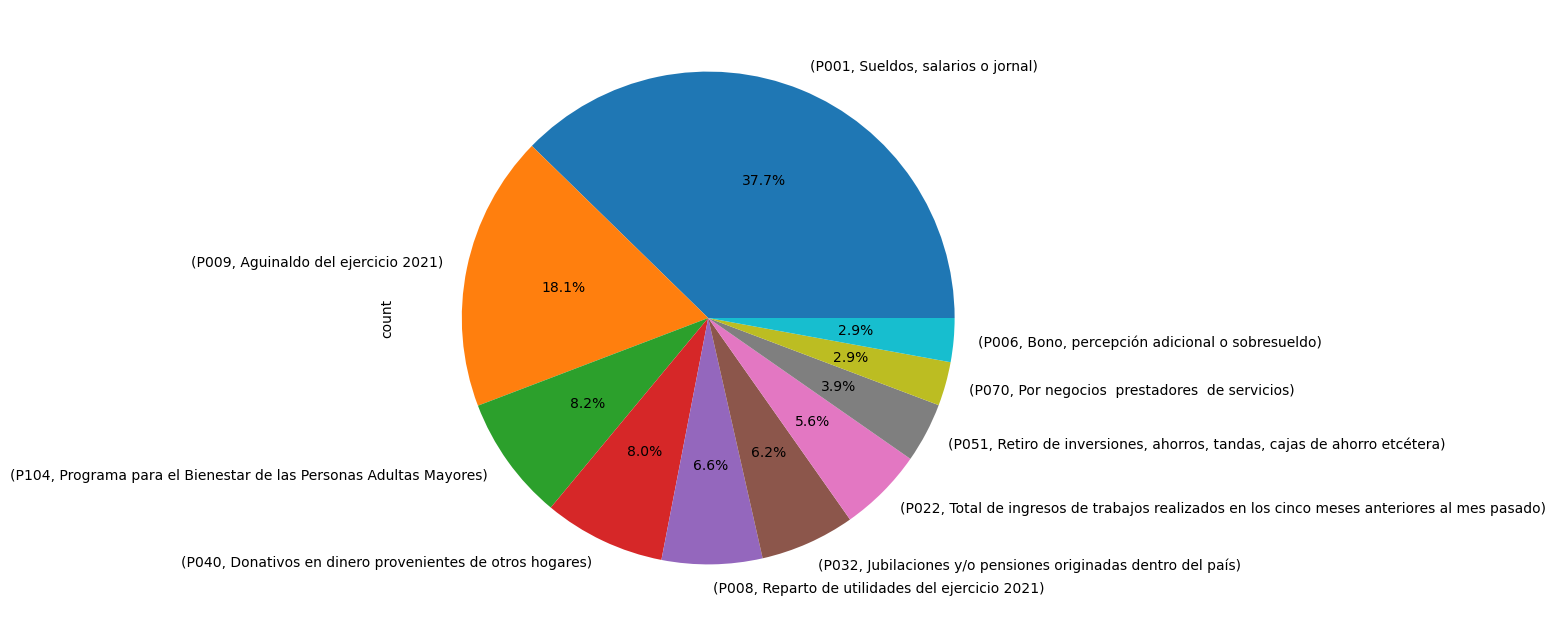

In [17]:
df_clave_desc = pd.merge(
  df,
  df_ingresos_cat,
  left_on='clave',
  right_on='ingresos_cat',
  how='left'
)[['clave', 'descripcion']]

df_clave_desc.value_counts().head(10).plot(
  kind='pie', 
  figsize=(8, 8),
  autopct='%1.1f%%',
)

<h3>Valor Promedio Mensual por Fuente de Ingreso por Estado</h3>

In [18]:
ingreso_men_por_ent = df.groupby('entidad')['ing_men'].mean().sort_values(ascending=False)
df_con_ent = pd.merge(
  ingreso_men_por_ent,
  df_entidad, 
  on='entidad',
  how='left'
)
df_con_ent['entidad'] = df_con_ent['descripcion']
df_con_ent = df_con_ent.drop('descripcion', axis=1)
df_con_ent

,entidad,ing_men
0,Baja California,6155.046306
1,Baja California Sur,5609.168440
2,Chihuahua,5293.409679
3,Ciudad de México,5069.461547
4,Jalisco,4708.913665
5,Sinaloa,4677.885017
6,Colima,4595.957321
7,Nayarit,4515.235423
8,Coahuila de Zaragoza,4509.016234
9,Nuevo León,4432.045573


<Axes: title={'center': 'Ingreso Mensual Promedio por Fuente, por Estado'}, xlabel='Entidad Federativa', ylabel='Ingreso Promedio (MXN)'>

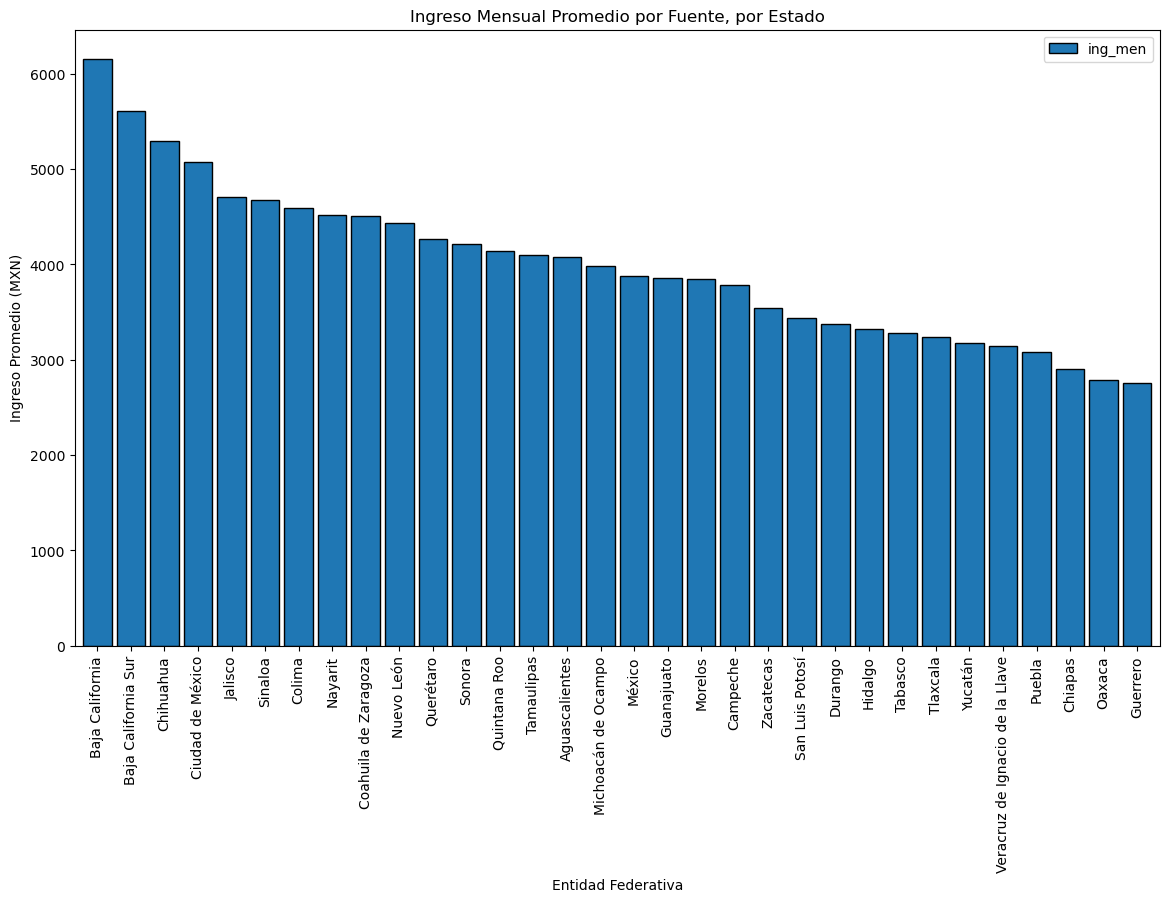

In [19]:
df_plot = df_con_ent.set_index('entidad')
df_plot.plot(
  kind='bar', 
  width=0.85, 
  edgecolor='black', 
  figsize=(14, 8), 
  title='Ingreso Mensual Promedio por Fuente, por Estado', 
  xlabel='Entidad Federativa', 
  ylabel='Ingreso Promedio (MXN)',
)

<h3>Salarios en Yucatán</h3>

<Axes: title={'center': 'Distribución de Salarios Mensuales en Yucatán (Clave P001)'}>

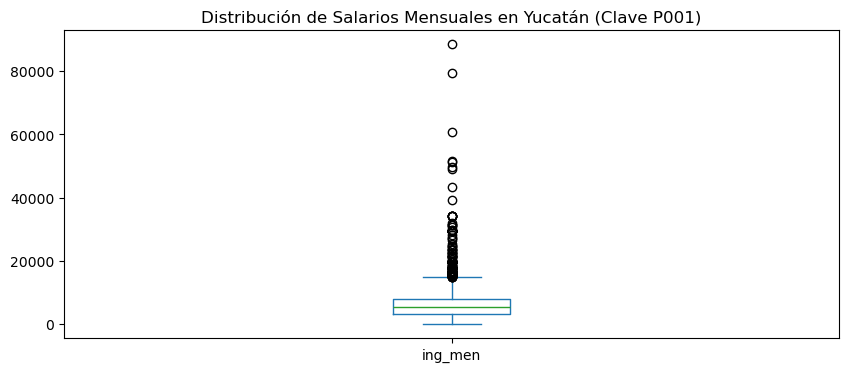

In [20]:
df_yucatan_salarios = df[
  (df['entidad'] == 31) &
  (df['clave'] == 'P001')
]
df_yucatan_salarios['ing_men'].plot(kind='box', figsize=(10, 4), title='Distribución de Salarios Mensuales en Yucatán (Clave P001)')


<Axes: title={'center': 'Distribución de Ingresos Mensuales en Yucatán (Clave P001)'}>

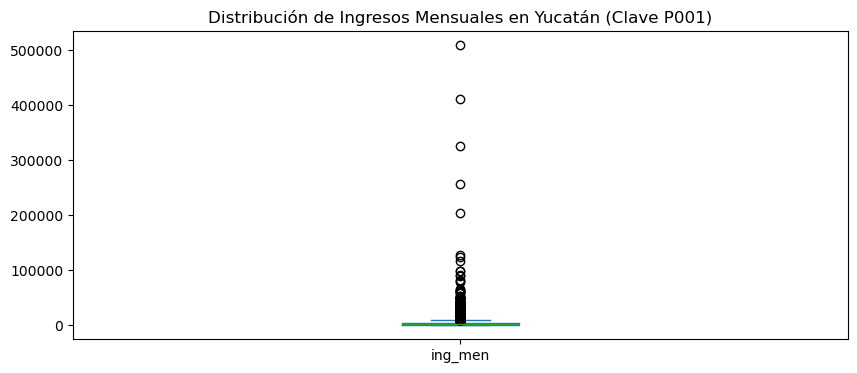

In [21]:
df_yucatan_ingresos= df[df['entidad'] == 31]
df_yucatan_ingresos['ing_men'].plot(kind='box', figsize=(10, 4), title='Distribución de Ingresos Mensuales en Yucatán (Clave P001)')
